In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler


In [9]:
#creating a 2-dimensional dataset containing two linearly correlated features
#using a bivariate normal distribution
np.random.seed(42)
mean  = [0,0]
cov = [[3,2],[2,2]]
X = np.random.multivariate_normal(mean=mean, cov=cov, size=200)


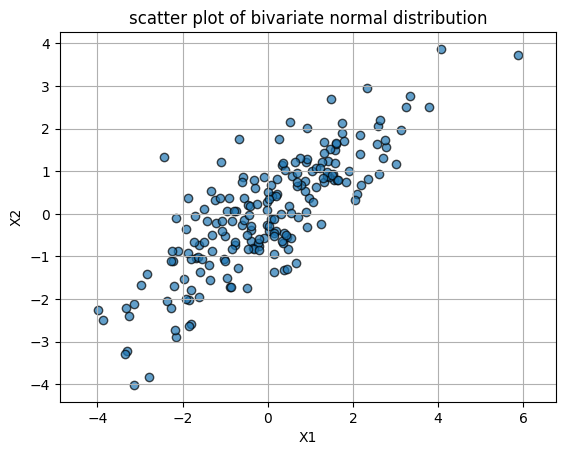

In [14]:
plt.figure()
plt.scatter(X[:,0],X[:,1],edgecolor='k',alpha = 0.7)
plt.title("scatter plot of bivariate normal distribution")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis('equal')
plt.grid(True)
plt.show()                                                                                              

In [19]:
#initializing a 2-component PCA model with default parameters and then fit and transform the feature space in one step
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca

array([[-1.04842083e+00, -1.06980963e-01],
       [-1.36011135e+00,  9.96147017e-01],
       [ 5.11856490e-01, -1.85703592e-01],
       [-3.35443240e+00,  5.15279173e-01],
       [ 1.01944843e+00,  3.23656540e-01],
       [ 9.99993608e-01, -3.43827870e-01],
       [-5.15830396e-01, -1.28757105e+00],
       [ 3.69352656e+00, -4.34071204e-01],
       [ 2.17840683e+00,  1.61153249e-01],
       [ 1.94340877e+00, -9.79848064e-01],
       [-3.11831842e+00, -1.44716110e-01],
       [-1.40136620e-01, -9.67741347e-01],
       [ 1.17663747e+00,  3.62976233e-02],
       [ 2.47387460e+00,  1.98959524e-01],
       [ 1.29417872e+00, -2.31456758e-01],
       [ 1.31032255e+00,  1.18809169e+00],
       [ 3.52808486e-02, -7.26407847e-01],
       [-1.75129025e+00, -8.16984783e-01],
       [-4.45442262e-01, -1.31897712e+00],
       [ 2.85114418e+00,  7.68521862e-02],
       [-1.56272391e+00,  1.03075622e-01],
       [ 2.58334834e-01, -2.27572148e-01],
       [ 3.16628576e+00, -5.33254004e-01],
       [ 1.

In [26]:
#extracting the principal components from the model
components = pca.components_
components
pca.explained_variance_ratio_
percentage = pca.explained_variance_ratio_[0]*100
print(percentage)


91.11946022205444


In [27]:
pca.explained_variance_ratio_

array([0.9111946, 0.0888054])

In [32]:
#projecting the data onto its principal component axis
projection_pc1 = np.dot(X,components[0])
projection_pc2 = np.dot(X,components[1])


In [33]:
x_pc1 = projection_pc1 * components[0][0]
y_pc1 = projection_pc1 * components[0][1]
x_pc2 = projection_pc2 * components[1][0]
y_pc2 = projection_pc2 * components[1][1]

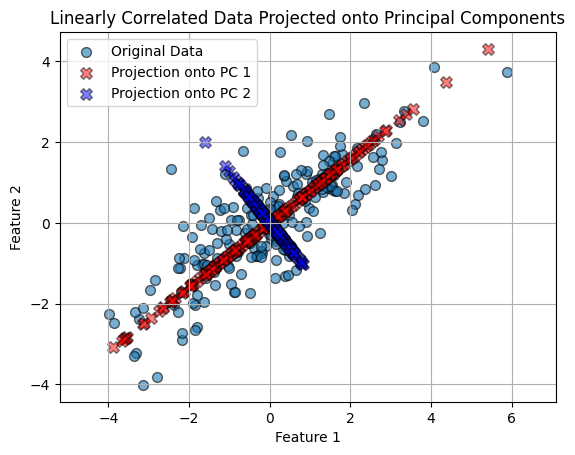

In [34]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], label='Original Data', ec='k', s=50, alpha=0.6)

# Plot the projections along PC1 and PC2
plt.scatter(x_pc1, y_pc1, c='r', ec='k', marker='X', s=70, alpha=0.5, label='Projection onto PC 1')
plt.scatter(x_pc2, y_pc2, c='b', ec='k', marker='X', s=70, alpha=0.5, label='Projection onto PC 2')
plt.title('Linearly Correlated Data Projected onto Principal Components', )
plt.xlabel('Feature 1',)
plt.ylabel('Feature 2',)
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

In [ ]:
#PCA for feature space dimensionality reduction using the iris dataset

In [47]:
import pandas as pd
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



['setosa' 'versicolor' 'virginica']


In [55]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [57]:
components = pca.components_
projection_pc1 = np.dot(X_scaled,components[0])
projection_pc2 = np.dot(X_scaled,components[1])


In [51]:
x_pc1 = projection_pc1 * components[0][0]
y_pc1 = projection_pc1 * components[0][1]
x_pc2 = projection_pc2 * components[1][0]
y_pc2 = projection_pc2 * components[1][1]

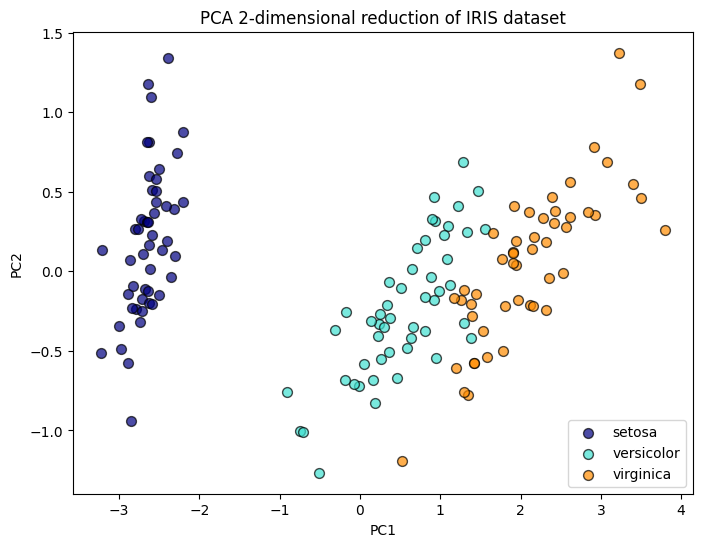

In [54]:
plt.figure(figsize=(8,6))

colors = ['navy', 'turquoise', 'darkorange']
lw = 1

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, s=50, ec='k',alpha=0.7, lw=lw,
                label=target_name)

plt.title('PCA 2-dimensional reduction of IRIS dataset',)
plt.xlabel("PC1",)
plt.ylabel("PC2",)
plt.legend(loc='best', shadow=False, scatterpoints=1,)
# plt.grid(True)
plt.show()

In [59]:
pca.explained_variance_ratio_
percentage = pca.explained_variance_ratio_[0]*100
print(percentage)

72.96244541329989


In [61]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762 0.03668922 0.00517871]


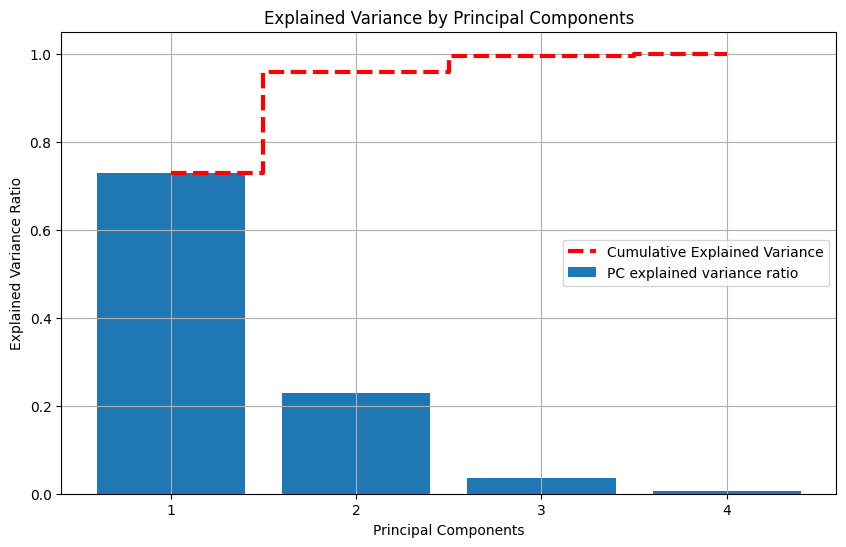

In [64]:
plt.figure(figsize=(10,6))
plt.bar(x=range(1, len(pca.explained_variance_ratio_)+1), height=pca.explained_variance_ratio_, alpha=1, align='center', label='PC explained variance ratio' )
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Explained Variance by Principal Components')
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.step(range(1, 5), cumulative_variance, where='mid', linestyle='--', lw=3,color='red', label='Cumulative Explained Variance')
plt.xticks(range(1, 5))
plt.legend()
plt.grid(True)
plt.show()